# Algoritmo de Dijkstra

O algoritmo de Dijkstra é um dos métodos mais utilizados para encontrar o menor caminho entre 
dois pontos em um grafo com pesos não-negativos. Ele é a base de vários sistemas reais, como 
aplicativos de GPS (Waze, Google Maps), roteamento em redes de computadores e logística de transportes.

Para esta implementação, simulamos um **problema real de navegação urbana**: cada vértice representa 
um ponto importante da cidade (cruzamentos, praças, terminais etc.), e cada aresta representa uma rua 
ligando dois desses pontos, com seu respectivo comprimento ou custo de deslocamento. O objetivo é 
descobrir qual a rota mais curta entre um ponto inicial e um ponto final — exatamente como um sistema 
de navegação faria para recomendar o melhor caminho ao motorista.

A ideia geral do algoritmo é a seguinte:

1. Todos os vértices começam com distância infinita (como se fossem inacessíveis).
2. O vértice inicial recebe distância 0.
3. Sempre escolho o vértice **não visitado** com a menor distância conhecida até o momento.
4. Verifico seus vizinhos e atualizo as distâncias se encontrar um caminho melhor (processo chamado de *relaxamento*).
5. Repito até que todos os vértices tenham sido processados.

O algoritmo funciona porque, ao escolher sempre o vértice com a menor distância acumulada ainda não visitado, 
aquela distância já é a melhor possível. Isso permite construir o caminho mais curto de maneira eficiente.


In [15]:
# Classe que representa uma aresta
class Edge:
    def __init__(self, target, weight):
        self.target = target  # vértice de destino
        self.weight = weight  # peso da aresta


# Classe que representa o grafo
class Graph:
    def __init__(self):
        #Lista de Adjacência
        self.adj = {}

    def add_vertex(self, v):
        """Adiciona um vértice ao grafo."""
        if v not in self.adj:
            self.adj[v] = []

    def add_edge(self, u, v, w):
        """
        Adiciona uma aresta u -> v com peso w.
        Para Dijkstra, não podem existir pesos negativos.
        """
        self.add_vertex(u)
        self.add_vertex(v)
        self.adj[u].append(Edge(v, w))


In [16]:
class DijkstraSimples:
    def __init__(self, graph):
        self.graph = graph

    def shortest_path(self, start):

        # Distância inicial: infinito para todo mundo
        dist = {v: float("inf") for v in self.graph.adj}

        # Antecessores para reconstruir caminho
        previous = {v: None for v in self.graph.adj}

        # A distância para o vértice inicial é 0
        dist[start] = 0

        # Conjunto de vértices já visitados
        visited = set()

        while len(visited) < len(self.graph.adj):

            # 1. Escolhe o vértice não visitado com a menor distância atual
            current = None
            current_dist = float("inf")

            for v in dist:
                if v not in visited and dist[v] < current_dist:
                    current = v
                    #atualizo a menor distância ate percorrer todos os vertices.
                    current_dist = dist[v]

            # Se não achou ninguém, fim
            if current is None:
                break

            # Marca como visitado
            visited.add(current)

            # 2. Relaxamento: atualiza as distâncias dos vizinhos
            # para cada aresta saindo de current
            for edge in self.graph.adj[current]:
                v = edge.target
                peso = edge.weight

                if dist[current] + peso < dist[v]:
                    dist[v] = dist[current] + peso
                    previous[v] = current

        return dist, previous

    def build_path(self, previous, target):
        """Reconstrói caminho final."""
        path = []
        atual = target

        while atual is not None:
            path.append(atual)
            atual = previous[atual]

        path.reverse()
        return path


In [17]:
# Criando o grafo com 16 vértices
g = Graph()

# Adicionando arestas (exemplo inspirado em um mapa simplificado)
g.add_edge("A", "B", 2)
g.add_edge("A", "C", 5)
g.add_edge("B", "D", 3)
g.add_edge("B", "E", 4)
g.add_edge("C", "F", 2)
g.add_edge("D", "G", 6)
g.add_edge("E", "H", 1)
g.add_edge("F", "I", 7)
g.add_edge("G", "J", 3)
g.add_edge("H", "K", 2)
g.add_edge("I", "L", 4)
g.add_edge("J", "M", 5)
g.add_edge("K", "N", 6)
g.add_edge("L", "O", 3)
g.add_edge("M", "P", 2)
g.add_edge("N", "P", 1)
g.add_edge("O", "P", 5)


In [20]:
import networkx as nx
import matplotlib.pyplot as plt


def show_graph_plot(graph):
    """
    Plota o grafo usando networkx.
    Cada vértice vira um nó e cada aresta aparece com seu peso.
    """

    G = (
        nx.DiGraph()
    )  

    
    for u in graph.adj:
        for edge in graph.adj[u]:
            G.add_edge(u, edge.target, weight=edge.weight)

    
    pos = nx.spring_layout(G, seed=42)

   
    nx.draw(
        G, pos, with_labels=True, node_size=1500, node_color="#81c8ff", font_size=10
    )

    
    labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    plt.title("Representação Gráfica do Grafo")
    plt.show()

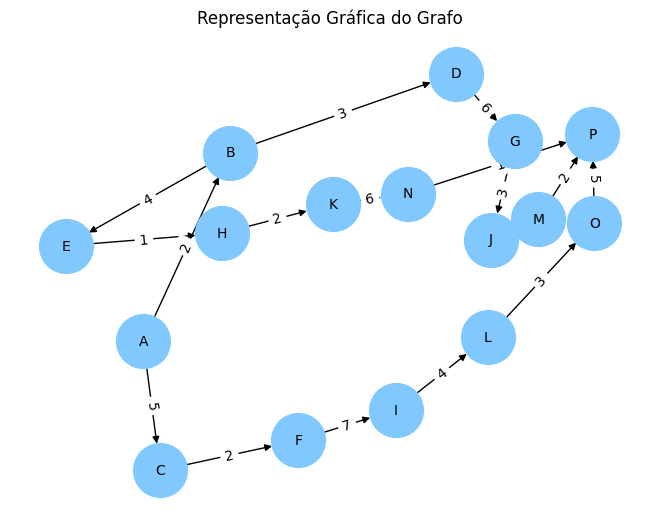

In [19]:
show_graph_plot(g)

In [21]:
d2 = DijkstraSimples(g)

dist, prev = d2.shortest_path("A")

print("Distâncias finais:")
for v in dist:
    print(v, dist[v])

print("\nCaminho de A até P:")
print(d2.build_path(prev, "P"))

Distâncias finais:
A 0
B 2
C 5
D 5
E 6
F 7
G 11
H 7
I 14
J 14
K 9
L 18
M 19
N 15
O 21
P 16

Caminho de A até P:
['A', 'B', 'E', 'H', 'K', 'N', 'P']


# Conclusão sobre o Algoritmo de Dijkstra

O algoritmo de Dijkstra mostrou-se uma solução eficiente para encontrar o menor caminho em grafos com pesos não-negativos, especialmente em contextos como rotas urbanas e navegação GPS. A implementação orientada a objetos permitiu organizar o grafo, as arestas e o algoritmo de forma clara, facilitando tanto o cálculo das distâncias mínimas quanto a reconstrução do caminho final.

A partir do processo de relaxamento e da escolha contínua do vértice com menor distância atual, o algoritmo garantiu resultados consistentes e precisos. Essa abordagem demonstra na prática como técnicas clássicas de grafos podem ser aplicadas diretamente em problemas reais de mobilidade, logística e redes de comunicação.
